## Prime Indians Diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/prime_indians_diabetes.csv')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

time_pregnant_no              0
plasma_concentration          0
diastolic_blood_pressure      0
triceps_skinfold_thickness    0
serum_insulin                 0
bmi                           0
diabetes_pedigree             0
age                           0
class                         0
dtype: int64

['num__plasma_concentration' 'num__diastolic_blood_pressure'
 'num__triceps_skinfold_thickness' 'num__serum_insulin' 'num__bmi'
 'num__diabetes_pedigree' 'num__age']


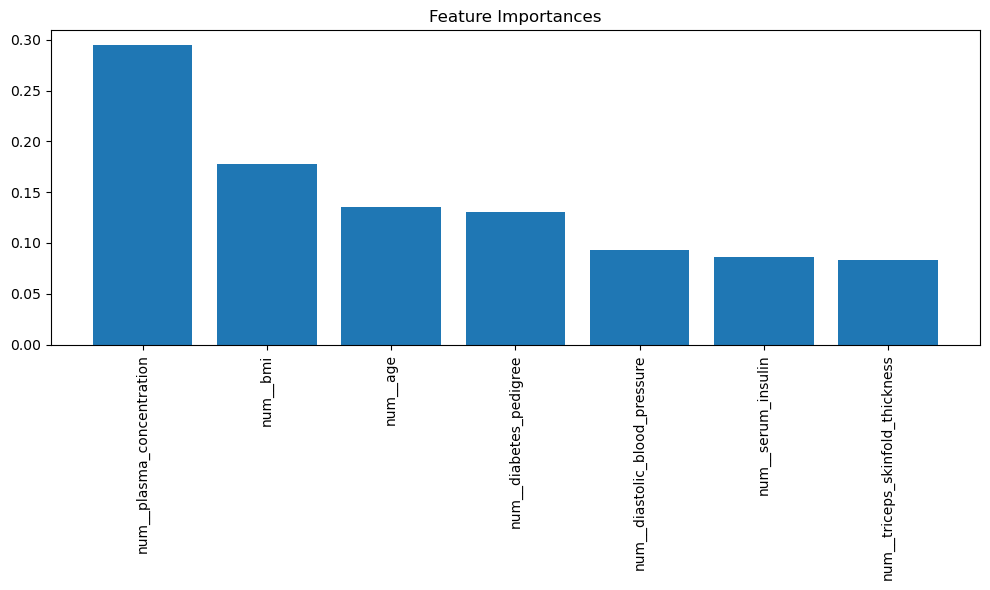

In [5]:
# Assuming your DataFrame is named 'df'
# 1. Replace 0's with NaN for the specified columns and then impute with mean
null_cols = ['plasma_concentration', 'diastolic_blood_pressure',
             'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
             'diabetes_pedigree', 'age']

df[null_cols] = df[null_cols].replace(0, np.nan)

# 2. Assign features to X and target variable to y
X = df.drop(columns=['class'])
y = df['class']

# 3. Create preprocessing pipeline for imputing and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale the features
])

# Apply the transformation to all columns in X
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, null_cols)
])

# 4. Create pipeline with preprocessing and RandomForestClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# 6. List the feature importances
rf = clf.named_steps['classifier']
importances = rf.feature_importances_

# Get the column names from the preprocessor after transformation
transformed_features = clf.named_steps['preprocessor'].get_feature_names_out()
print(transformed_features)

# 7. Create a bar plot for feature importances
# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), transformed_features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report after dropping the least important feature:")
print(report)

Classification Report after dropping the least important feature:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



## Drop Least Improt Features

In [7]:
# Get feature importances and least important feature
importances = clf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)
least_important_feature = X.columns[indices[-1]]  # Get least important original feature

# Drop the least important feature from the original DataFrame
X_dropped = X.drop(columns=[least_important_feature])

# Repeat steps after dropping the least important feature
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, stratify=y, test_size=0.2, random_state=42)

# Fit the model again
clf.fit(X_train, y_train)
y_pred_dropped = clf.predict(X_test)

# Make predictions after dropping the least important feature
y_pred_dropped = clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_dropped)
print("Classification Report after dropping the least important feature:")
print(report)

Classification Report after dropping the least important feature:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



## Drop least 2 important features

In [8]:
# Fit the model if it hasn't been done yet
clf.fit(X, y)

# Get the ColumnTransformer directly
transformer = clf.named_steps['preprocessor']

# Transform the input features to get the transformed feature set
X_transformed = transformer.transform(X)

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Get feature importances from the classifier
importances = clf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)

# Select the last three least important features
least_important_features = feature_names[indices[:2]]  # Get the names of the least important features

# Convert transformed X back to DataFrame to drop the least important features
X_dropped = pd.DataFrame(X_transformed, columns=feature_names).drop(columns=least_important_features)

# Split the data after dropping the least important features
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, stratify=y, test_size=0.2, random_state=42)

# Fit the model again
clf.named_steps['classifier'].fit(X_train, y_train)

# Make predictions after dropping the least important features
y_pred_dropped = clf.named_steps['classifier'].predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_dropped)
print("Classification Report after dropping the least important features:")
print(report)


Classification Report after dropping the least important features:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

